# 주제: 카메라 스티커앱 만들기

## 활동
1. 왕관 스티커 붙이기
2. 고양이 스티커 붙이기

## 데이터
사진 약 10장, 왕관 사진, 고양이 수염 사진

## 목표
1. 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키기
2. 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력하기
3. 얼굴각도, 이미지 밝기, 촬영거리, 정확도, 실행시간 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하기

## 1. 왕관 스티커 붙이기

### (1) 라이브러리 및 데이터 불러오기

In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

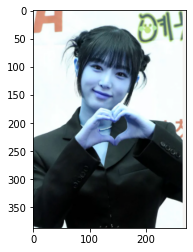

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/예나.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지 출력 준비
plt.show() # 이미지 출력

### (2) 얼굴 검출 face detection

In [3]:
#얼굴 검출
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [4]:
# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(86, 86) (175, 176)]]


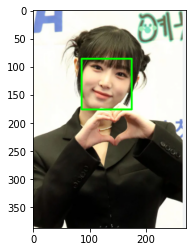

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (3) 얼굴 랜드마크 face landmark

In [6]:
# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

In [7]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


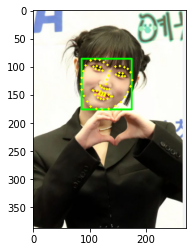

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

### (4) 스티커 적용하기

In [9]:
# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print (landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #왕관 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #왕관 이미지 크기

(129, 131)
(x,y) : (129,86)
(w,h) : (90,90)


In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(90, 90, 3)


In [11]:
# 스티커 이미지를 추가하기 위해서 x, y 좌표 조정. 이미지 시작점은 top-left 좌표이기 때문.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
refined_x = x - w // 2 
refined_y = y - h - 20 #더 위로 올리고 싶어서 -20을 추가함

print (f'(x,y) : ({refined_x},{refined_y})') # 왕관 아미지 시작점

(x,y) : (84,-24)


In [12]:
# 음수발생 시 음수값만큼 이미지 자르기
# 좌표 순서가 y,x임에 유의: . (y,x,rgb channel)
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (84,0)


In [13]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

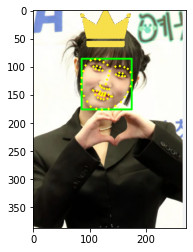

In [14]:
# 왕관 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

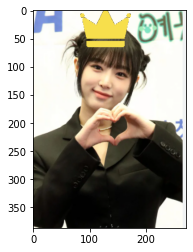

In [15]:
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 이렇게 예나 사진에 왕관 올리기 완성하였다. 얼굴이 작아서 그런지 너무 눈썹에 딱 달라붙게 내려와서 위로 올리기 위해 y축 좌표를 20정도 줄였더니 스티커가 알맞게 더 위로 올라갔다.

## 2. 고양이 스티커 붙이기

### (1) 라이브러리 및 데이터 불러오기

In [16]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

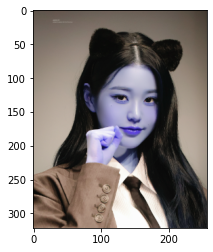

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/원영.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지 출력 준비
plt.show() # 이미지 출력

### (2) 얼굴 검출 face detection

In [18]:
#얼굴 검출
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [19]:
# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(106, 106) (195, 196)]]


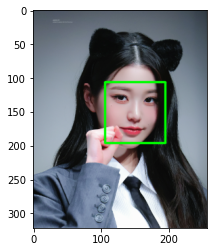

In [20]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (3) 얼굴 랜드마크 face landmark

In [21]:
# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

In [22]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


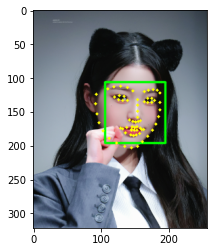

In [23]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

### (4) 스티커 적용하기

In [24]:
# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print (landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기

(154, 158)
(x,y) : (154,113)
(w,h) : (90,90)


In [25]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print (img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인

(90, 90, 3)


In [26]:
# 스티커 이미지를 추가하기 위해서 x, y 좌표 조정. 이미지 시작점은 top-left 좌표이기 때문.
# 즉, refined_x, refined_y값에서 고양이 이미지가 시작됨
refined_x = x -w//2
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

(x,y) : (109,113)


In [27]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

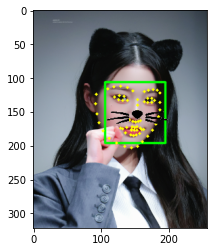

In [28]:
# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

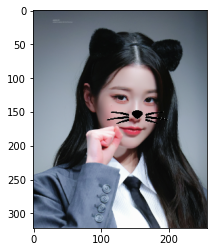

In [29]:
# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### (5) 문제점 찾아보기
## 1. 얼굴 각도가 정면이 아닌 곳을 보고있다면?

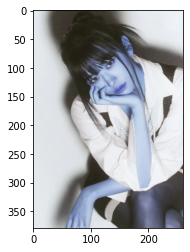

In [30]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/유진.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지 출력 준비
plt.show() # 이미지 출력

-> face detection은 가능하지만 face landmark에서 out of range 오류가 뜬다. 그래서 좀더 이목구비가 보이는 사진을 골랐다.

rectangles[[(38, 82) (167, 211)]]


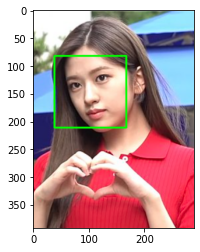

랜드마크 갯수:  68


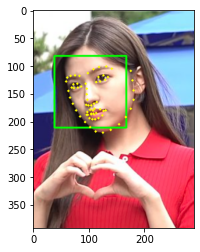

코의 인덱스:  (97, 161)
(x,y) : (97,96)
(w,h) : (130,130)
고양이 이미지 차원 확인:  (130, 130, 3)
(x,y) : (32,96)


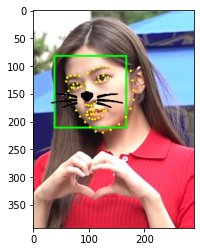

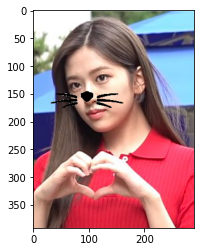

In [31]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/유진2.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = [] 

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 얼굴 각도가 앞면에서 face landmark가 가능한 정도면 그 점을 기준으로 스티카 붙이기가 가능하다. 하지만 face landmark가 불가능한 각도로 얼굴이 틀어져 있다면 불가능하다.

## 2. 얼굴이 정면을 보고있지만 각도가 기울여져 있다면?

rectangles[[(92, 68) (315, 291)]]


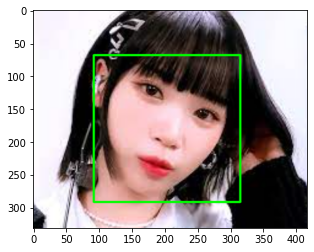

랜드마크 갯수:  68


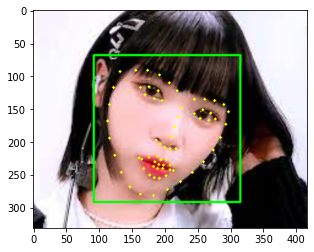

코의 인덱스:  (211, 192)
(x,y) : (211,80)
(w,h) : (224,224)
고양이 이미지 차원 확인:  (224, 224, 3)
얼굴이 틀어진 각도:  -18.82471001824007


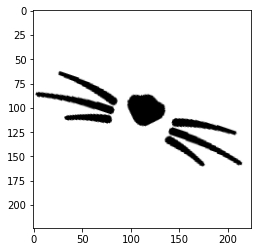

(x,y) : (99,80)


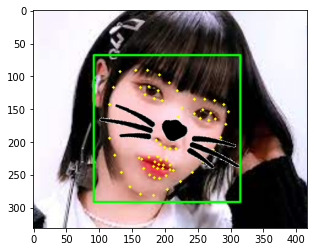

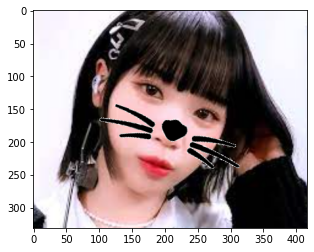

In [32]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/채원.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인

# 회전 각 구하기
import math
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print("얼굴이 틀어진 각도: ", rotate_angle)

# 이미지 회전시키기
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
    return result

img_rotate = rotate_image(img_sticker,rotate_angle)
plt.imshow(img_rotate)
plt.show()

# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]

img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 얼굴 각도가 많이 틀어져있지 않을 땐 face landmark가 가능하며 부자연스러운 스티커의 위치나 각도는 조정하면 된다.

## 3. 이미지가 회전해있다면?

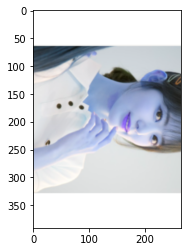

rectangles[]


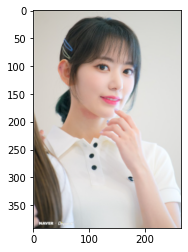

IndexError: list index out of range

In [33]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/사쿠라.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#사진 회전
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
    return result

img_bgr = rotate_image(img_bgr, -90)
plt.imshow(img_bgr)
plt.show()

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환, 바운딩 박스
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> img_bgr 이미지를 rbg로 바꾸고 바운딩 박스를 만들어야하는데 rectangles[] 리스트가 null값이 되면서 진행이 되지 않았다. 이를 통해 바운딩박스를 실행하려면 이미지가 회전되지 않아야 인식이 되는 것을 알 수 있다.

## 4. 여러 사람이 있다면?

rectangles[[(127, 50) (170, 94)], [(309, 166) (352, 209)], [(233, 153) (285, 205)], [(209, 50) (245, 86)], [(429, 146) (472, 190)], [(50, 60) (93, 103)], [(157, 18) (193, 54)], [(337, 38) (373, 74)], [(389, 58) (425, 94)], [(103, 185) (146, 228)]]


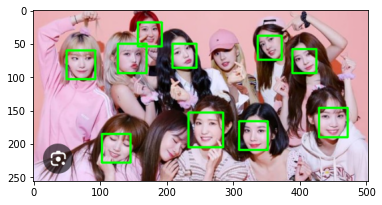

랜드마크 갯수:  68


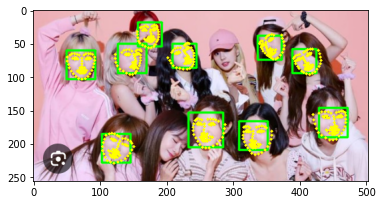

코의 인덱스:  (154, 75)
(x,y) : (154,53)
(w,h) : (44,44)
코의 인덱스:  (329, 193)
(x,y) : (329,171)
(w,h) : (44,44)
코의 인덱스:  (256, 183)
(x,y) : (256,157)
(w,h) : (53,53)
코의 인덱스:  (231, 67)
(x,y) : (231,49)
(w,h) : (37,37)
코의 인덱스:  (453, 172)
(x,y) : (453,150)
(w,h) : (44,44)
코의 인덱스:  (73, 84)
(x,y) : (73,62)
(w,h) : (44,44)
코의 인덱스:  (177, 38)
(x,y) : (177,20)
(w,h) : (37,37)
코의 인덱스:  (350, 56)
(x,y) : (350,38)
(w,h) : (37,37)
코의 인덱스:  (409, 78)
(x,y) : (409,60)
(w,h) : (37,37)
코의 인덱스:  (125, 208)
(x,y) : (125,186)
(w,h) : (44,44)
고양이 이미지 차원 확인:  (44, 44, 3)
(x,y) : (103,186)


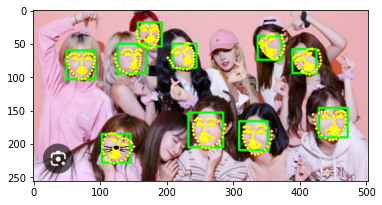

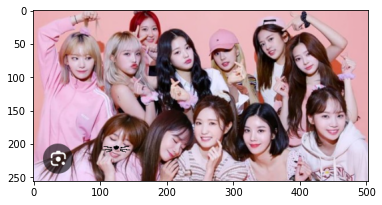

In [34]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/아이즈원.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 여러 사람이어도 인식도 잘되고 스티커도 붙여진다. 바운딩박스와 랜드마크를 만드는 리스트를 만들어서 반복문을 시행한 것 처럼 스티커 붙이기도 시행하면 될 것 같다.

## 5. 이미지 밝기가 다르다면?

rectangles[[(96, 46) (185, 136)]]


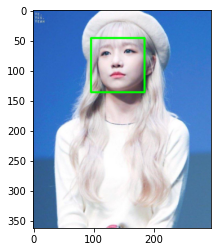

랜드마크 갯수:  68


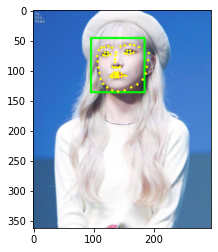

코의 인덱스:  (136, 86)
(x,y) : (136,41)
(w,h) : (90,90)
고양이 이미지 차원 확인:  (90, 90, 3)
(x,y) : (91,41)


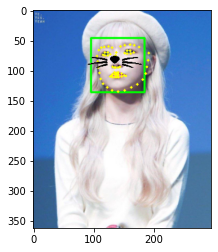

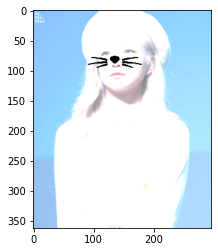

In [44]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/유리.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

img_bgr = cv2.add(img_bgr, (100, 100, 100, 0))

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

rectangles[[(129, 38) (204, 113)]]


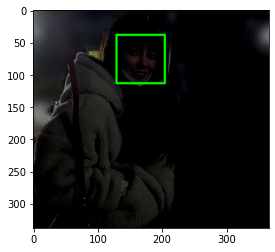

랜드마크 갯수:  68


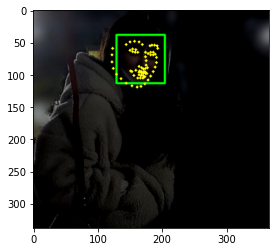

코의 인덱스:  (175, 85)
(x,y) : (175,47)
(w,h) : (76,76)
고양이 이미지 차원 확인:  (76, 76, 3)
(x,y) : (137,47)


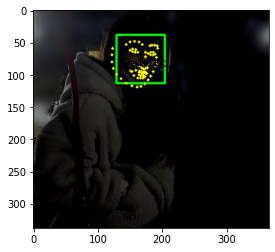

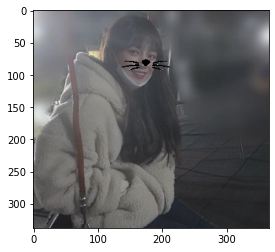

In [43]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/유리2.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

img_show = cv2.subtract(img_show, (100, 100, 100, 0))

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 밝은 사진에 더 밝게도 해보고 어두운 사진에 더 어둡게도 해봤는데 인식이 잘된다. 바운딩 박스와 랜드마크하는 기능이 굉장히 세밀하고 좋은 것 같다. 

rectangles[]


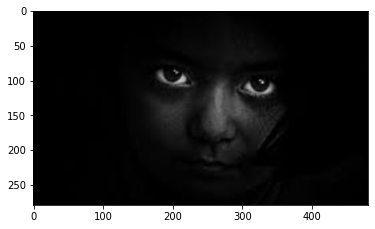

IndexError: list index out of range

In [45]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/어두운사진.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 더 어두운 사진도 시도해보았더니 인식이 잘 되지 않는다. 위에서 했던 예시와 이번 예시가 사람 눈에는 똑같이 어두워보이는데 컴퓨터 이미지 처리상으로는 이번 사진은 인식이 더 어려운 사진인 것 같다.  

## 6. 이미지가 가려져있다면?

rectangles[]


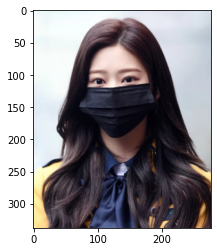

IndexError: list index out of range

In [36]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/민주.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

rectangles[[(20, 80) (127, 187)]]


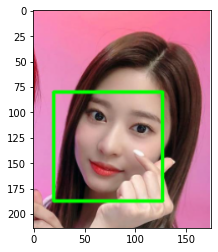

랜드마크 갯수:  68


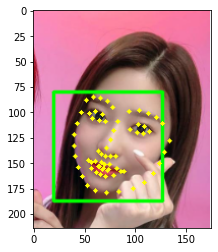

코의 인덱스:  (72, 135)
(x,y) : (72,81)
(w,h) : (108,108)
고양이 이미지 차원 확인:  (108, 108, 3)
(x,y) : (18,81)


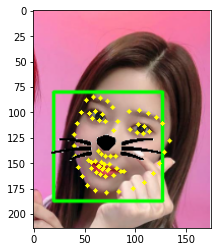

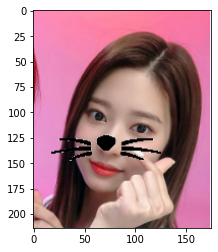

In [46]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/민주2.PNG' # 사진 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관

#얼굴 검출
detector_hog = dlib.get_frontal_face_detector()

# bgr을 rgb로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델의 주소
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #모델 부르기

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고 face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 형태로 변환하여 리스트로 저장
    list_landmarks.append(list_points)

print("랜드마크 갯수: ", len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지 준비
plt.show() # 이미지 출력

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #zip: 두 그룹의 데이터 엮기 
    print ("코의 인덱스: ", landmark[30]) # 코의 index: 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})') #고양이 이미지 중간 아래 포인트
    print (f'(w,h) : ({w},{h})') #고양이 이미지 크기
    
# 스티커
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴, 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print ("고양이 이미지 차원 확인: ", img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인


# 스티커 좌표
refined_x = x - w // 2 
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') # 고양이 아미지 시작점

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 고양이 이미지를 적용한 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

-> 3번 이미지 회전의 경우처럼 마스크로 가려져 있으면 rectangles[] 리스트가 null값이 되면서 진행이 되지 않았다. 이를 통해 바운딩박스를 실행하려면 살짝 가려지는 것은 가능하지만 어느정도 이목구비가 보여야 한다는 것을 알 수 있다.

# 프로젝트회고

## 배운점
1. dlib에서 제공하는  detector_hog함수를 통하여 쉽게 face bounding box를 할 수 있다는 점
2. 고양이 수염 이미지는 배경이 하얀색이어서 0이 아닌 255로 변경해야한다는 점
3. rotate 함수로 고개를 갸우뚱하게 틀어져도 고양이 수염 이미지의 각도도 회전하여 적용할 수 있다는 점 -> 처음에 단순하게 img_sticker에 cv2.rotate를 적용했을 때는 bonuding box와 같이 사진이 돌아갔었다. 최종 사진에서 부자연스럽게 검정색의 빈 공간이 생겼다. 이런 빈 공간 없이 자연스럽게 스티커 사진만 회전하는 방법을 찾다가 팀원이 도움으로 스티커 사진의 중심점을 잡고 돌리는 함수를 적용하여 문제를 해결하였다. 
4. 이미지 밝기 조절은 cv2.add함수와 cv2.subtract함수로 쉽게 할 수 있다는 것을 배웠다.
5. 창의적이고 다양한 방식으로 bounding box와 landmark의 한계가 어디까지인지 실험할 수 있었다.

## 아쉬운점
1. 이미지에서 사람의 얼굴이 옆을 보고 있을 때도 detetion이 가능할때가 있는데 거기에 어울리게 고양이 수염 이미지를 붙이는 방법을 한 사람이 있었다. 그렇게 시도해보고 싶었는데 어려워서 포기했다.
2. 4번 여러 사진에 스티커 붙이기를 하려고 하였으나 시간이 부족해서 하지 못하였다 다음에 해보아야겠다.

## 종합의견
다양한 방식으로 bounding box와 landmark의 한계를 실험할 수 있었다. 뿐만 아니라 다양한 의문들에 맞는 이미지로 만들기 위해 시도한 방식들을 통하여도 많이 배웠다. 이미지 위치 옮기기, 회전, 밝기 조절 등등 유익했다. 

# Reference
1. 고양이 사진  
https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1  
2. 이미지 회전 참고한 깃헙  
https://github.com/dldndyd01/AI_STUDY/blob/master/FaceDetection/FaceDetection-rotation.ipynb  
3. 사진 밝기 조절  
https://deep-learning-study.tistory.com/114  
4. cv.imread  
https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html  
5. 이미지 pyramid  
https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html  
6. 이미지 landmarkd 논문  
https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf  